In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import scipy.integrate as integrate

In [ ]:
pip install pynverse

  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp37-none-any.whl size=6365 sha256=dfc7c75c3160ca8e253d52393703e58a26d471f6e21770f0762503ab1cee5610
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse


In [ ]:
from pynverse import inversefunc

In [ ]:
class Hopfield():

  def __init__(self,x,W,E,iters):
    self.x = x;
    self.T = self.create_T(W,E);
    self.bias = self.create_bias(W,E);
    self.iters = iters;

  def create_T(self,W,E):
    n = W.shape[0] #number of neurons
    T = np.zeros((n,n))
    for i in range(n):
      for j in range(n):
        if(i!=j):
          T[i][j] = 2*E[i][j] - 4*W[i]*W[j]; 
    return T;

  def create_bias(self,W,E):
    n = W.shape[0] #number of neurons
    B = np.zeros(n);
    sum = np.sum(W);
    for i in range(n):
      B[i] = 2*W[i]*sum - 2*W[i]*W[i] - np.sum(E[i,:]);
    return B; 

  def train(self):
    err_lst = [];
    n = self.x.shape[0];
    for i in range(self.iters):
      #error = self.cost();
      #err_lst.append(error);
      index = randint(0,n-1);
      x[index] = self.update(index,i,err_lst);
    return x,err_lst; 

  def add_noise(self):
    noise1 = np.random.normal(0,0.5,self.bias.shape)
    self.bias = self.bias + noise1  
    noise2 = np.random.poisson(0.25,self.x.shape)
    self.x = self.x + noise2

  def cost(self,index):
    func = lambda u : (1+np.tanh(u))/2
    inv = inversefunc(func)
    temp = np.dot(np.dot(np.transpose(self.x),self.T),self.x)
    [cost] = -temp/2;
    cost = cost - np.matmul(np.transpose(self.x),self.bias)
    cost = cost + integrate.quad(lambda y :inv(y),0,x[index])
    return cost;
    
  def update(self,index,i,err_lst):
    n = self.x.shape[0];
    err_lst.append(self.cost(index))
    #noise1 = np.random.normal(0,5,1); # gaussian noise of zero mean
    #noise2 = 0#np.random.poisson(1)
    T0 = 10
    temp = self.T[index,:].reshape(n,1);
    val = np.matmul(np.transpose(self.x),temp);
    I = val + self.bias[index]
    #T = T0*(1-i/self.iters)*(1-i/self.iters)
    #pb = 1/(1+np.exp(-I/T))
    #pb = float(pb)
    #new_state = np.random.choice([1,0],p=[pb,1-pb])
    #return new_state
    u = x[index]+(0.005)*(I-x[index]) #+(noise1+noise2)*(1-i/self.iters)*(1-i/self.iters)-x[index])
    return (1+np.tanh(u))/2
    #if(state>=700):
      #return 1;
    #if(state<=-700):
      #return 0;  

array([[0.01843585],
       [0.01224667],
       [0.97620377],
       [0.98362762]])

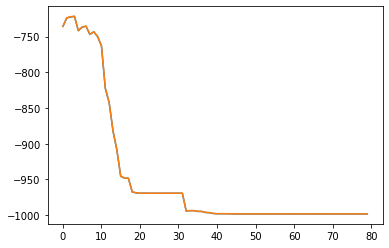

In [ ]:
W = np.array([[10],[11],[12],[13]]);
W = W
x = np.random.uniform(size = (4,1))
#print(x)
E = np.array([[0,150,1,10],[150,0,10,10],[1,10,0,1],[10,10,1,0]])
E = E
h = Hopfield(x,W,E,80)
x,err_lst = h.train()
plt.plot(err_lst)
x
#err_lst

In [ ]:
rep = 100
counter=0;
for i in range(rep):
  W = np.array([[10],[11],[12],[13]]);
  x = np.random.uniform(size = (4,1))
  E = np.array([[0,150,1,10],[150,0,10,10],[1,10,0,1],[10,10,1,0]])
  E = E
  h = Hopfield(x,W,E,100)
  x,err_lst = h.train()
  if((x == np.array([[1.],[1.],[0.],[0.]])).all() or (x == np.array([[0.],[0.],[1.],[1.]])).all()):
    counter+=1;
print(counter/float(rep));    
print(counter)

0.62
62
